In [4]:
#IMPORTS

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns


In [5]:
#DEF
#DEF UPPER CHANNEL
def upperchanel(chanlesnames):
    upperchanels=[]
    for i in chanlesnames:
        r = i.upper()
        upperchanels.append(r)
    return upperchanels

#DEF GRUP INFO DE CADA COMPONENT
def group_inf(nomgroup, data_chan, upperchanels):
    group_date = []

    for e in nomgroup:
        if e in upperchanels:
            num = upperchanels.index(e)
            #print(num)
            group_date.append(data_chan[num])  
    #print(group_date)
    return group_date

#DEF MEDIUM DELS GRUPS
#group_dat = [[1,2,3,..., 119345],[1,2,3,..., 119345],[1,2,3,..., 119345],[1,2,3,..., 119345]]
def mediumchanels(group_dat):
    segundo = len(group_dat[0])
    primero = len(group_dat)
    mean_data = []
    for i in range (0,segundo):
        suma1=[]
        for e in range(0,primero):
            suma1.append(group_dat[e][i])
        numpero = statistics.median(suma1)
        mean_data.append(numpero)
    return mean_data


def opteciogrups(chanlesnames, groupp, data_chan):
    group_date_finale = [] #Save all informatio chanels 12.
    group_date_final = [] #final copy
    upchan = upperchanel(chanlesnames)
    for i in groupp:
        group_date = group_inf(i, data_chan, upchan)
        mean_group = mediumchanels(group_date)
        mean_array = np.array(mean_group)
        group_date_finale.append(mean_array)
    group_date_final = np.array(group_date_finale)
    return group_date_final
    


In [6]:
#general info
#GROUPS
group1= ["FP2", "AFZ", "FZ", "FCZ", "CZ"]
group2= ["F7", "F5", "F3", "F1", "AF7", "AF3", "FP1"]
group3= ["FP2", "AF4", "AF8", "F2", "F4", "F6", "F8"]
group4= ["FT7", "T7", "TP7"]
group5= ["FC5", "FC3", "FC1", "C5", "C3", "C1"]
group6= ["CP5", "CP3", "CP1", "P7", "P5", "P3", "P1"]
group7= ["PO7", "PO3", "O1", "PO9"]
group8= ["PO4", "PO8", "O2", "PO10"]
group9= ["P2", "P4", "P6", "P8", "CP2", "CP4", "CP6"]
group10= ["FT8", "T8", "TP8"]
group11= ["CPZ", "PZ", "POZ", "OZ", "IZ"]
group12= ["FC2", "FC4", "FC6", "C2", "C4", "C6"]

#X
groups = [group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12]

In [7]:
#LOAD
x2=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010003_EC.set', preload=True, verbose=True)
#GET DATA
datax2 = x2._data
#GET CHANELS
chanles_names2 = x2.ch_names
#REDUCE CHANELS TO 12
groups_date_finalle2 = opteciogrups(chanles_names2, groups, datax2)
#TRANSFORM TO MNE
titlegrup = ["ch1","ch2","ch3","ch4","ch5","ch6","ch7","ch8","ch9","ch10","ch11","ch12"]
ct_ty = ["eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg"]
sfreq = 250
info = mne.create_info(ch_names=titlegrup, sfreq=sfreq, ch_types=ct_ty)
raw2 = mne.io.RawArray(groups_date_finalle2, info)

Reading Files/Preprocessed/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...
Creating RawArray with float64 data, n_channels=12, n_times=119516
    Range : 0 ... 119515 =      0.000 ...   478.060 secs
Ready.


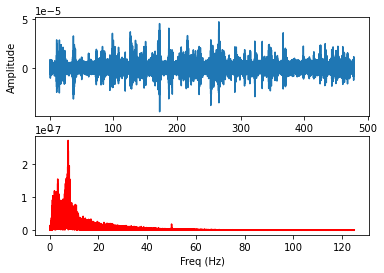

In [8]:
#ALL

import math
data = groups_date_finalle2[0]

Fs = 250.0
Ts = 1.0/Fs
t = np.arange(len(data)) / Fs

n = len(data) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))]

Y = np.fft.fft(data)/n
Y = Y[range(int(n/2))]


fig, ax = plt.subplots(2, 1)
ax[0].plot(t,data)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r')
ax[1].set_xlabel('Freq (Hz)')

plt.draw()
plt.show()

Info.; Epoch: 1; Len of the data: 1255; Channel: 1


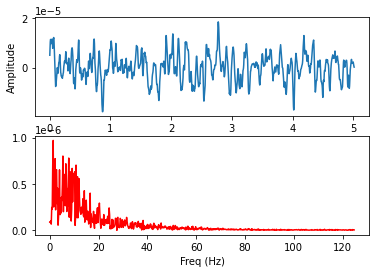

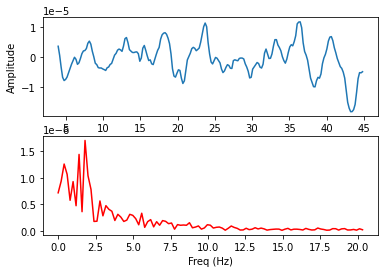

Info.; Epoch: 2; Len of the data: 1255; Channel: 1


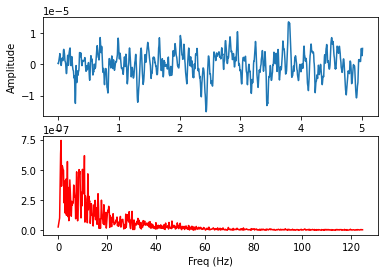

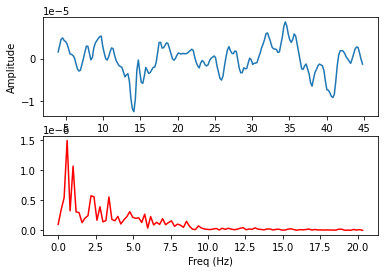

Info.; Epoch: 3; Len of the data: 1255; Channel: 1


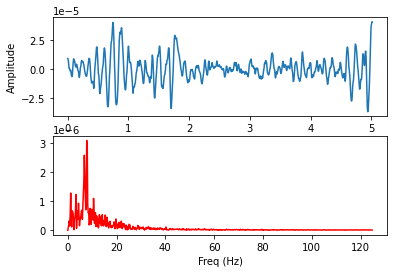

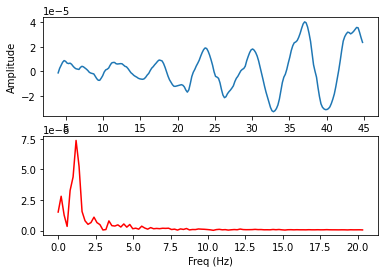

Info.; Epoch: 4; Len of the data: 1255; Channel: 1


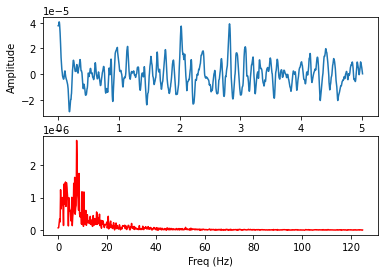

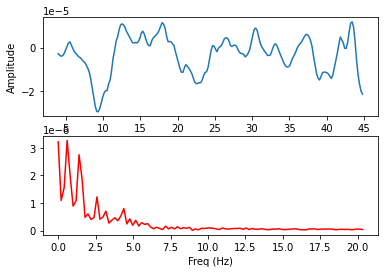

Info.; Epoch: 5; Len of the data: 1255; Channel: 1


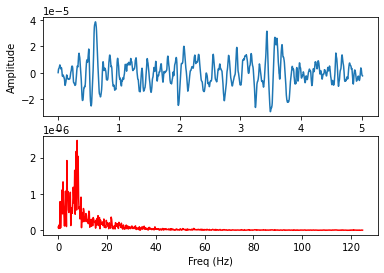

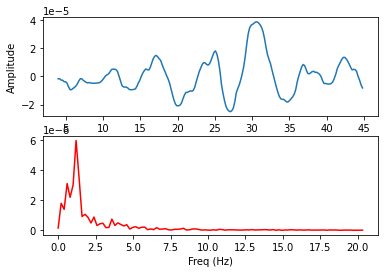

Info.; Epoch: 6; Len of the data: 1255; Channel: 1
Info.; Epoch: 7; Len of the data: 1255; Channel: 1
Info.; Epoch: 8; Len of the data: 1255; Channel: 1
Info.; Epoch: 9; Len of the data: 1255; Channel: 1
Info.; Epoch: 10; Len of the data: 1255; Channel: 1
Info.; Epoch: 11; Len of the data: 1255; Channel: 1
Info.; Epoch: 12; Len of the data: 1255; Channel: 1
Info.; Epoch: 13; Len of the data: 1255; Channel: 1
Info.; Epoch: 14; Len of the data: 1255; Channel: 1
Info.; Epoch: 15; Len of the data: 1255; Channel: 1
Info.; Epoch: 16; Len of the data: 1255; Channel: 1
Info.; Epoch: 17; Len of the data: 1255; Channel: 1
Info.; Epoch: 18; Len of the data: 1255; Channel: 1
Info.; Epoch: 19; Len of the data: 1255; Channel: 1
Info.; Epoch: 20; Len of the data: 1255; Channel: 1
Info.; Epoch: 21; Len of the data: 1255; Channel: 1
Info.; Epoch: 22; Len of the data: 1255; Channel: 1
Info.; Epoch: 23; Len of the data: 1255; Channel: 1
Info.; Epoch: 24; Len of the data: 1255; Channel: 1
Info.; Epoch: 25

In [55]:
#epoch fuction (5s split with overlap)(n epochs x)
# for each epoch power sepctral density
colors = mcolors.BASE_COLORS 
sf=250

printsome = 0
tinici = 0
tfinal = 1257
r=0
numepo= 1
chanel = 1

save_epoc_data = []
save_epoc_temps = []

def find_nearest(array,value):
       idx = (np.abs(array-value)).argmin()
       return int(idx)

def grabt(dat):
    Fs = 250.0
    Ts = 1.0/Fs
    t = np.arange(len(dat)) / Fs
    return t


for i in range(0,int(int(T)/5)):

    t = grabt(groups_date_finalle2[chanel])

    epoc_temps = t[tinici:tfinal-2]
    epoc_data = groups_date_finalle2[chanel,tinici:tfinal-2]

    print("Info.; Epoch: "+str(numepo)+"; Len of the data: "+str(len(epoc_data))+"; Channel: "+str(chanel))
    numepo=numepo+1

    if printsome<=4:

        x = epoc_data
        coeffs = wavedec(x, 'db4', level=6)

        #See data frq and time plt.
        Fs = 250.0 
        Ts = 1.0/Fs
        tn = np.arange(len(x)) / Fs
        n = len(x)                    #Length of the signal
        k = np.arange(n)
        Tn = n/Fs
        frq = k/Tn # two sides frequency range
        frq = frq[range(int(n/2))]
        Y = np.fft.fft(x)/n
        Y = Y[range(int(n/2))]
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(tn,x)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')
        ax[1].plot(frq,abs(Y),'r')
        ax[1].set_xlabel('Freq (Hz)')


        #Select Gamma frequencie
        #https://numpy.org/doc/stable/reference/generated/numpy.trapz.html 
        ti = find_nearest(frq, 4)
        tf = find_nearest(frq, 45)

        powerv = epoc_data[ti:tf]
        mm = frq[ti:tf]

        r = (45-4)/len(mm)
        valor=4
        tnBETTA=[]
        for e in range(0,len(mm)):
            tnBETTA.append(valor)
            valor=valor+r
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(tnBETTA,powerv)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')


        nBETTA = len(powerv)                    #Length of the signal
        k = np.arange(nBETTA)
        TnBETTA = nBETTA/45
        frqBETTA = k/TnBETTA # two sides frequency range
        frqBETTA = frq[range(int(nBETTA/2))]

        YBETTA = np.fft.fft(powerv)/nBETTA
        YBETTA = YBETTA[range(int(nBETTA/2))]

        ax[1].plot(frqBETTA,abs(YBETTA),'r')
        ax[1].set_xlabel('Freq (Hz)')
        #tr = np.trapz( ,powerv) #big band

        #find the "small" band
        '''tf = find_nearest(frq, 4)
        ti = find_nearest(frq, 45)
        powerv = x[ti:tf]
        tr = numpy.trapz( x,powerv)'''

        #Divided each one with the big band

        #http://centaur.reading.ac.uk/76159/9/biosensors-08-00030%20%281%29.pdf 
        #Power Spectral Density (PSD) for low frequency range (0.04 Hz to 0.15 Hz) 
        Y = np.fft.fft (power)/10
        Y = Y [range(10//2)]
        LF = np.trapz (np.abs(Y[(frq ≥ 0.04) & (frq ≤ 0.15)]))
        #PSD for high frequency range (0.16 Hz to 0.4 Hz)
        HF = np.trapz(np.abs (Y[(frq ≥ 0.15) & (frq ≤ 0.4)]))
        #PSD ratio between LF and HF
        LHF = LF / HF
 

        '''f, Pxx_spec = signal.welch(x, 250, 'flattop', 1024, scaling='density')
        plt.figure()
        plt.semilogy(f, np.sqrt(Pxx_spec))
        plt.xlabel('frequency [Hz]')
        plt.ylabel('Linear spectrum [V RMS]')
        plt.title('Power spectrum (scipy.signal.welch)')
        plt.show()
        
        pywt.dwt(x, wavelet)
'''

        
        #cD5 - b.Power - power spectral density - (after - cut it in frec. and find the average, see it under the spectrum).
        printsome=printsome+1


    tfinal=tfinal+1257
    tinici= tinici+1257


In [10]:
#https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html

In [12]:
#standar erros mean
#filter 30hz? paper check
# - preproz bandpass filtered within 1-45 Hz (8th order, Butterworth filter)
# - (vi) band-pass filtering between 0.01-0.1 Hz (FSL),

# Gamma

# http://www.sci.utah.edu/publications/anderson10/Anderson_python_processing2010.pdf
#-



# cut it to diferent frec. bands theta (4-8Hz), alpha(8-13Hz), beta(13-30Hz), gamma(30-45Hz).
#-

#aver. ex/4-8 for power values -> 1 feature x epoch x sub. x brain region (chanels 12).
#all up / all bands  (to se the band power %)